# Bruno Renzi Marques

Aprendi analizando estes dados que nem sempre o melhor modelo é o mais preciso, que as vezes poucas variáveis são melhores do que várias e quais são as provas que ter maior impacto na nota total do ENEM.

## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
import warnings
warnings.simplefilter("once")

!pip install pandas=="0.24.0" --quiet
!pip install seaborn =="0.9.1" --quiet
!pip install scipy =="1.2.0" --quiet
!pip install yellowbrick =="0.9.0" --quiet
!pip install numpy =="1.16.0" --quiet

C:\Users\brunorm\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\brunorm\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\brunorm\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:131: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
ERROR: Invalid requirement: '==0.9.1'
ERROR: Invalid requirement: '==1.2.0'
ERROR: Invalid requirement: '==0.9.0'
ERROR: Invalid requirement: '==1.16.0'


In [2]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.1
Usando scipy 1.2.0
Usando yellowbrick 0.9
Usando numpy 1.18.1


C:\Users\brunorm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x) #Este código aparentemente não estava funcionando comigo, então decidi arredondar manualmente. 

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [4]:
# solução

enem = pd.read_csv('input/MICRODADOS_ENEM_2017.csv', 
                   sep = ';', 
                   encoding = 'iso-8859-1', 
                   usecols = ["NU_NOTA_CN","NU_NOTA_CH",
                   "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", 
                   "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", 
                   "NU_NOTA_COMP5"])

In [5]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [6]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

#Abrindo o dicionário através em um software de planilha eletrônica, obtêm-se as seguintes informações:


- **NU_NOTA_CN**: Nota da prova de Ciências Naturais (Física, Química, Biologia).

- **NU_NOTA_CH**: Nota da prova de Ciências Humanas (Geografia, História, Filosofia e Sociologia).

- **NU_NOTA_LC**: Nota da prova de Liguagens e Códigos (Gramática, Artes e Linguam Estrangeira (Inglês ou Espanhol)).

- **NU_NOTA_MT**: Nota da prova de Matemática.


- **NU_NOTA_COMP1**: Nota da competência 1 em redação - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.

- **NU_NOTA_COMP2**: Nota da competência 2 em redação - Compreender a proposta de redação e plaicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.

- **NU_NOTA_COMP3**: Nota da competência 3 em redação - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.

- **NU_NOTA_COMP4**: Nota da competência 4 em redação - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.

- **NU_NOTA_COMP5**: Nota da competência 5 em redação - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.

In [7]:
# solução

todas_as_notas = ['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 
                  'NU_NOTA_MT','NU_NOTA_COMP1', 'NU_NOTA_COMP2', 
                  'NU_NOTA_COMP3','NU_NOTA_COMP4', 'NU_NOTA_COMP5']
todas_as_notas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5']

In [8]:
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [9]:
# solução

enem.dropna(inplace = True)
enem['NU_NOTA_MT'][:5].values

array([465.5, 591.2, 584.6, 578.5, 607.5])

## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [10]:
# solução e impressão

enem["nota_total"] = enem.sum(axis = 1)
enem["nota_total"][:5].values

array([2681.4, 2949.5, 2786.7, 2795. , 2858.5])

Observa-se então que as notas totais possuem uma média de 2592.747, uma mediana de 2569.3, e um desvio padrão de 2592.747
Portanto, para uma intervalo de confiança de 95%, essa distribuição varia entre 1800.767 e 3384.726


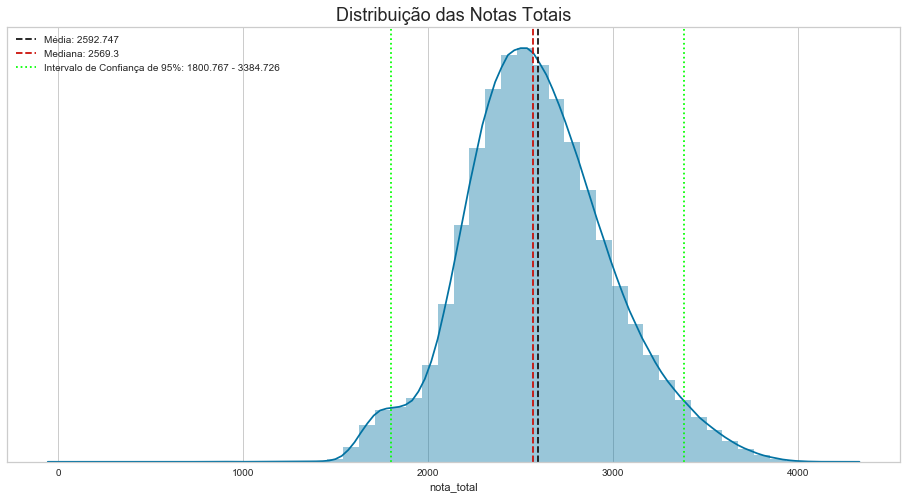

In [11]:
import matplotlib.pyplot as plt

# solução histograma e descrição

plt.figure(figsize = (16,8))
plt.title("Distribuição das Notas Totais", fontsize = 18)
plt.xlabel("Valor da nota total")

media = enem["nota_total"].mean()
mediana = enem["nota_total"].median()
std = enem["nota_total"].std()
ic_1 = media - 2 * std
ic_2 = media + 2 * std

plt.xlabel("Valor da nota total")
plt.yticks([])
ax = sns.distplot(enem["nota_total"])
ax_media = plt.axvline(media, color = 'k', ls = 'dashed')
ax_mediana = plt.axvline(mediana, color = 'r', ls = 'dashed')
ax_ic1 = plt.axvline(ic_1, color = 'lime', ls = 'dotted')
ax_ic2 = plt.axvline(ic_2, color = 'lime', ls = 'dotted')
plt.legend([ax_media, ax_mediana, ax_ic1], [f'Média: {round(media,3)}', f'Mediana: {round(mediana, 3)}', f'Intervalo de Confiança de 95%: {round(ic_1, 3)} - {round(ic_2, 3)}'])


print(f'Observa-se então que as notas totais possuem uma média de {round(media,3)}, uma mediana de {round(mediana,3)}, e um desvio padrão de {round(media,3)}')
print(f'Portanto, para uma intervalo de confiança de 95%, essa distribuição varia entre {round(media - 2 * std, 3)} e {round(media + 2 * std, 3)}')

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

A amostra apresenta uma média de 2594.186, uma mediana de 2572.8 e um devio-padrão de 396.483.
 
Enem EDA sampling tem a distribuição: 


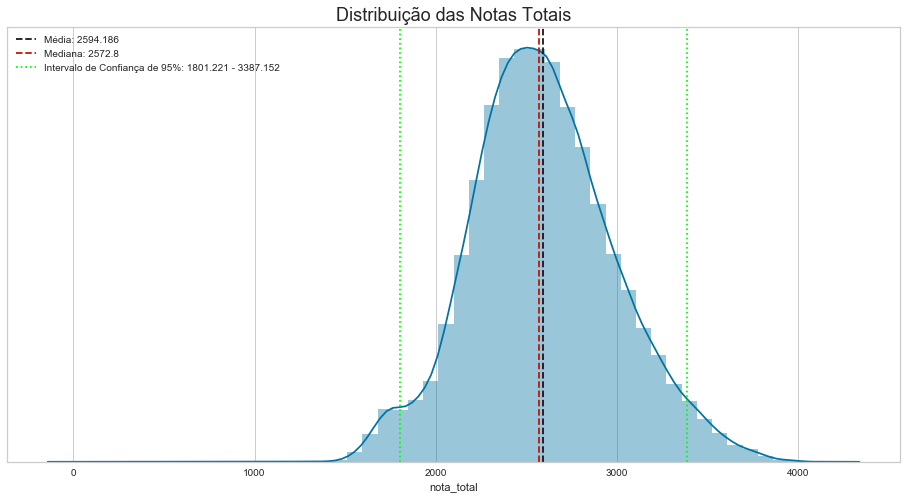

In [12]:
import matplotlib.pyplot as plt

# solução sua função de sampling


def eda_sample(enem):
    # seed
    # 1% de sample em enem_eda
    
    SEED = 745
    enem_eda = enem.sample(frac = 0.01, random_state = SEED)
    
    media = enem_eda["nota_total"].mean()
    mediana = enem_eda["nota_total"].median()
    std = enem_eda["nota_total"].std()
    ic_1 = media - 2 * std
    ic_2 = media + 2 * std
    
    print(f"A amostra apresenta uma média de {round(media, 3)}, uma mediana de {round(mediana, 2)} e um devio-padrão de {round(std, 3)}.")
    print(" ")
    print("Enem EDA sampling tem a distribuição: ")
    
    plt.figure(figsize = (16,8))
    plt.title("Distribuição das Notas Totais", fontsize = 18)
    plt.xlabel("Valor da nota total")
    plt.yticks([])
    
    ax = sns.distplot(enem_eda["nota_total"])
    ax_media = plt.axvline(media, color = 'k', ls = 'dashed')
    ax_mediana = plt.axvline(mediana, color = 'r', ls = 'dashed')
    ax_ic1 = plt.axvline(ic_1, color = 'lime', ls = 'dotted')
    ax_ic2 = plt.axvline(ic_2, color = 'lime', ls = 'dotted')
    plt.legend([ax_media, ax_mediana, ax_ic1], [f'Média: {round(media,3)}', f'Mediana: {round(mediana, 3)}', f'Intervalo de Confiança de 95%: {round(ic_1, 3)} - {round(ic_2, 3)}'])

    # descreva a nota_total
    # plote o histograma da nota_total e mostre com plt.show()
    return enem_eda

enem_eda = eda_sample(enem)

Sim, a amostra parece representar bem o conjunto total de dados, possuindo média, mediana e desvio-padrão próximos.

## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [13]:
# solução
correlacoes = enem.corr()
correlacoes

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
NU_NOTA_CN,1.000,0.612,0.570,0.549,0.345,0.319,0.390,0.384,0.356,0.733
NU_NOTA_CH,0.612,1.000,0.708,0.570,0.398,0.359,0.436,0.427,0.394,0.794
NU_NOTA_LC,0.570,0.708,1.000,0.542,0.441,0.370,0.455,0.446,0.396,0.776
NU_NOTA_MT,0.549,0.570,0.542,1.000,0.357,0.325,0.394,0.391,0.353,0.760
NU_NOTA_COMP1,0.345,0.398,0.441,0.357,1.000,0.774,0.833,0.862,0.594,0.726
NU_NOTA_COMP2,0.319,0.359,0.370,0.325,0.774,1.000,0.859,0.796,0.631,0.693
NU_NOTA_COMP3,0.390,0.436,0.455,0.394,0.833,0.859,1.000,0.867,0.673,0.773
NU_NOTA_COMP4,0.384,0.427,0.446,0.391,0.862,0.796,0.867,1.000,0.653,0.761
NU_NOTA_COMP5,0.356,0.394,0.396,0.353,0.594,0.631,0.673,0.653,1.000,0.677
nota_total,0.733,0.794,0.776,0.760,0.726,0.693,0.773,0.761,0.677,1.000


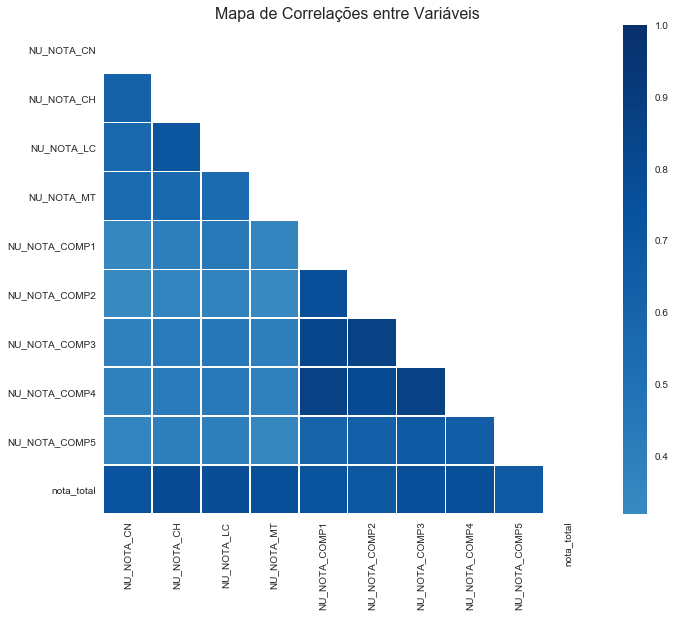

In [14]:
mask = np.triu(np.ones_like(correlacoes, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title("Mapa de Correlações entre Variáveis", fontsize = 16)
sns.heatmap(correlacoes ,mask = mask, cmap = "Blues", center = 0,
            square=True, linewidths=.5)

In [15]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")

Analisando as correlações, nota-se o seguinte:

- Cada nota individual possuem uma alta correlação com a nota total. Portanto, pessoas que tiraram uma nota alta em alguma disciplina tende e ter uma nota total alta também. Isso faz sentido, pois para se ter uma nota total alta, a maioria das notas devem ser altas.


- As notas de competência da redação possuem uma alta correlação em si, com exceção da nota de compentência 5. Portanto, pode-se notar que alunos que apresentam domínio gramatical da norma culta, que estruturam bem o texto para o gênero textual solicitado ou que saibam argumentar, não necessariamente sabiam elaborar uma proposta de solução do problema proposto respeitando os direitos humanos.


- A nota em ciências humanas possuem uma correlação a nota da prova de linguagens, o que faz sentido pela proximidade dos conteúdos estudados entre as disciplinas (Artes e Literatura possuem uma grande fundamentação histórica). Porém, por mais que isso pareça intuitivo, as notas de matemática não tem uma alta correlação com as ciências naturais, por mais que estas sejam ciências com base matemática.


- Notas altas nas provas dissertivas possui uma correlação baixa com notas de competências de redação. Contudo, notas altas em linguagens parecem ter uma correlação maior com a notas altas na redação. 

## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [16]:
# solução: cálculo da tabela de correlação com todas as notas

correlacao_com_nota_total = correlacoes['nota_total']

In [17]:
print(correlacao_com_nota_total)

NU_NOTA_CN      0.733
NU_NOTA_CH      0.794
NU_NOTA_LC      0.776
NU_NOTA_MT      0.760
NU_NOTA_COMP1   0.726
NU_NOTA_COMP2   0.693
NU_NOTA_COMP3   0.773
NU_NOTA_COMP4   0.761
NU_NOTA_COMP5   0.677
nota_total      1.000
Name: nota_total, dtype: float64


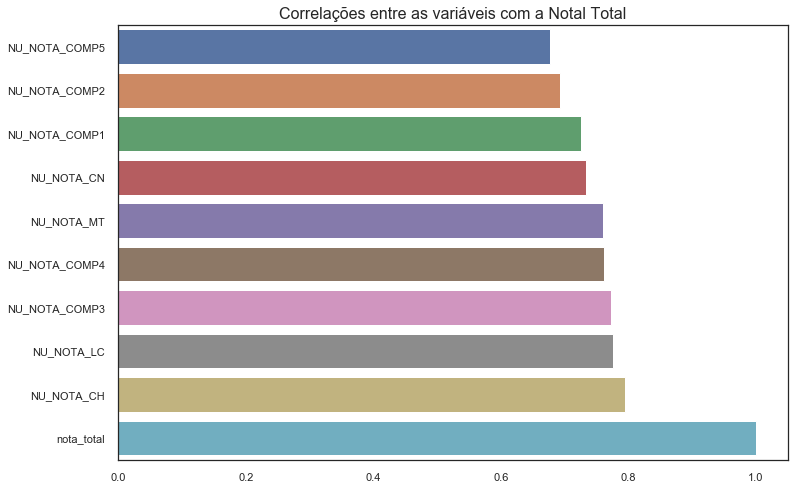

In [18]:
# solução gráfico

def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 8))
    plt.title("Correlações entre as variáveis com a Notal Total", fontsize = 16)
    corr = dados.sort_values()
    sns.barplot(y=corr.index, x=corr.values)
    
plota_correlacao(correlacao_com_nota_total)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [19]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos

interesse = enem_eda[['NU_NOTA_MT','NU_NOTA_LC','nota_total']]
interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,nota_total
3066813,418.700,514.900,2471.600
249978,652.200,466.100,2807.900
2399891,532.700,539.900,2577.300
3959805,578.500,647.300,3198.700
5505273,374.900,419.900,2247.700


In [20]:
# Solução: a função de split

from sklearn.model_selection import train_test_split

def split(dados):
    # seed
    # train_test_split
    
    SEED = 42367
    train_x, test_x, train_y, test_y = train_test_split(dados.drop('nota_total', axis = 1),dados['nota_total'], random_state = SEED)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", round(test_y.std(),3))
    return train_x, test_x, train_y, test_y

In [21]:
# Código pronto

train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 396.677


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [23]:
# Solução: função para executar a regressão linear

def roda_regressao_linear(train_x, test_x, train_y, test_y):
    
    # crie o modelo, treine com os dados de treino
    # calcule o r2_score com os dados de teste
    # calcule a predição e os dois tipos de erros
    
    model = LinearRegression()
    model.fit(train_x, train_y)
    r2_score = model.score(test_x, test_y)
    
    test_pred = model.predict(test_x)
    mse = mean_squared_error(test_y, test_pred)
    mae = mean_absolute_error(test_y, test_pred)
    print("*" * 80)
    print("r2 score", r2_score)
    print("mse", mse)
    print("mae", mae)
    
    return model

In [24]:
# código pronto

roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.7692311471988331
mse 36308.89210227678
mae 142.102755998379


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

In [25]:
print(f"O desvio padrão do test_y é de {test_y.std()}")

O desvio padrão do test_y é de 396.6774613706172


## Solução

O erro médio absoluto das previsões quando comparadas com os resultados é menor que o desvio padrão do conjunto de testes. Quando consideramos que o desvio padrão é uma medida da variação dos dados ao redor de uma média, podemos dizer que o modelo é mais preciso do que simplesmente adotar o valor médio da nota total para qualquer predição. Portanto, este modelo é valido de ser utilizado (precisão maior que o dummy_regression).

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

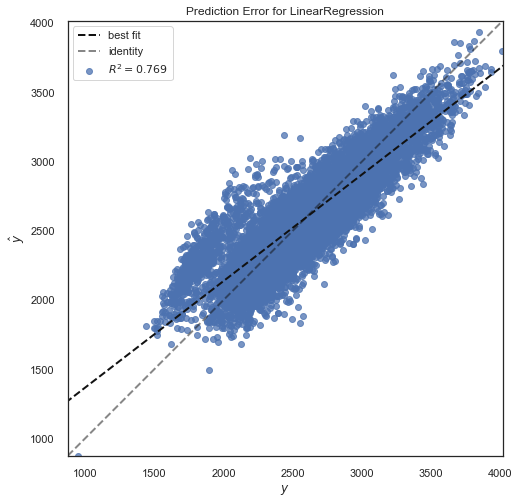

In [26]:
# código pronto

from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    plt.figure(figsize = (12, 8))
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

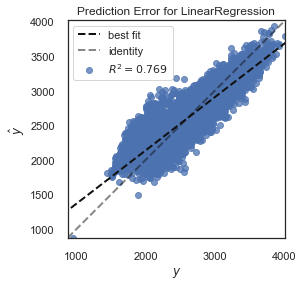

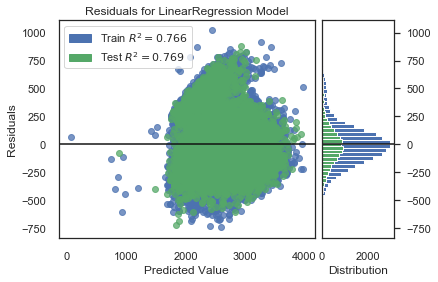

In [27]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [28]:
# código pronto

def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 9) (33201,) (11067, 9) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.677
********************************************************************************
r2 score 1.0
mse 1.974674622096219e-25
mae 3.276034102990925e-13


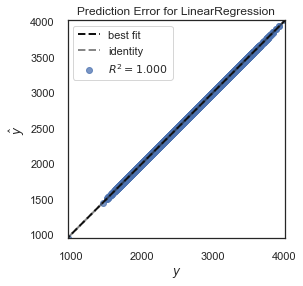

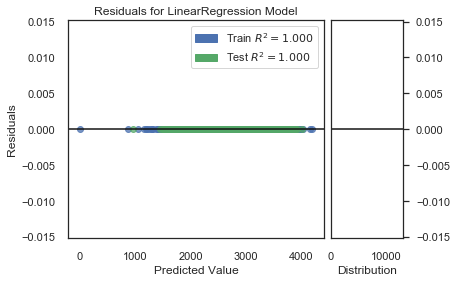

In [29]:
# solução 1: teste com todas as notas
# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total

regressao_completa_para(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 
                         'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 
                         'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'nota_total'])

**ATENÇÃO!!!** Esse modelo tem 100% de acurácia porque a nota total nada mais é do que a soma de todas as notas. Portanto, esse modelo sequer faz sentido

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 8) (33201,) (11067, 8) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'] como X
Desvio padrão do conjunto de testes 396.677
********************************************************************************
r2 score 0.9929379014409435
mse 1111.1420431480792
mae 26.289560074407646


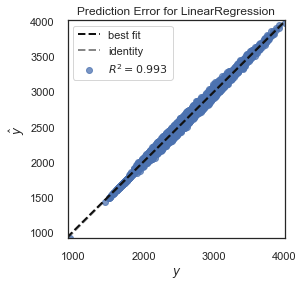

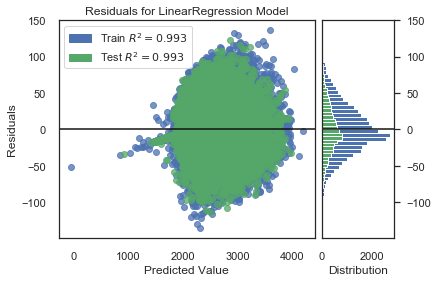

In [30]:
# solução 2: teste retirando a variável com menor correlação (NU_NOTA_COMP5)

regressao_completa_para(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 
                         'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 
                         'NU_NOTA_COMP4', 'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 8) (33201,) (11067, 8) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_MT' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2'
 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.677
********************************************************************************
r2 score 0.9883402624153573
mse 1834.5290049451282
mae 32.86323856603762


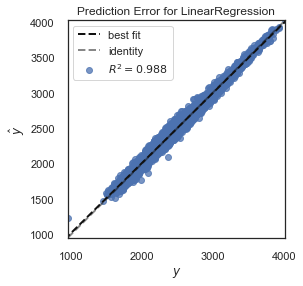

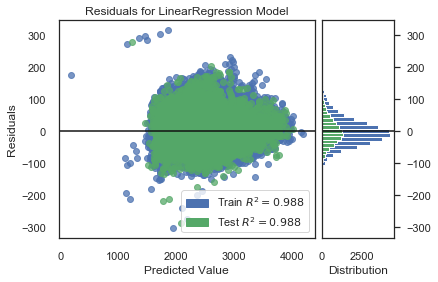

In [31]:
# solução 3: teste retirando as notas de linguagens (possui uma alta correlação com outra variável independente, 
# podendo indicar multicolinearidade)

regressao_completa_para(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 
                         'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 
                         'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 8) (33201,) (11067, 8) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP2'
 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.677
********************************************************************************
r2 score 0.9979644418309157
mse 320.27225958813085
mae 14.442083296598105


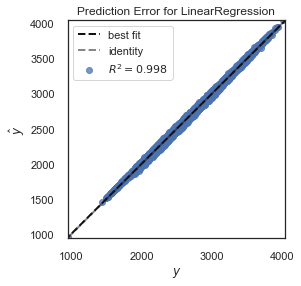

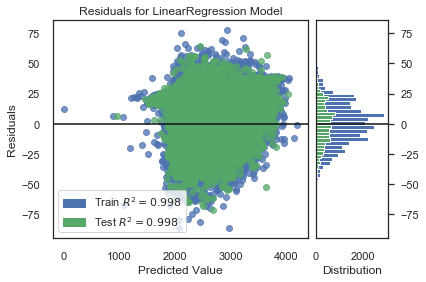

In [32]:
# solução 4: teste retirando as notas de competência 1 da redação (possível multicolinearidade)

regressao_completa_para(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 
                         'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 
                         'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 8) (33201,) (11067, 8) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.677
********************************************************************************
r2 score 0.9976042099676082
mse 376.950705131647
mae 15.14716870829108


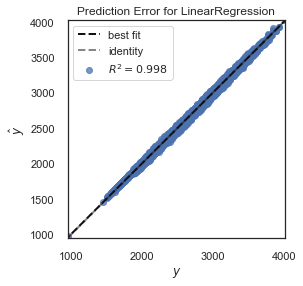

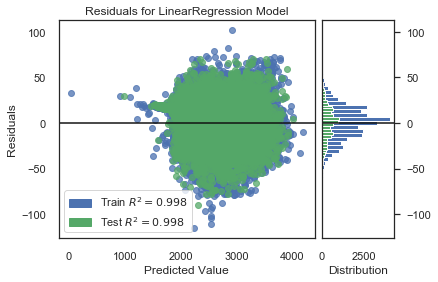

In [33]:
# solução 5: teste retirando as notas de competência 2 da redação (possível multicolinearidade)

regressao_completa_para(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 
                         'NU_NOTA_COMP1', 'NU_NOTA_COMP3', 
                         'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 8) (33201,) (11067, 8) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.677
********************************************************************************
r2 score 0.998430700838394
mse 246.91163145851436
mae 12.181102634391717


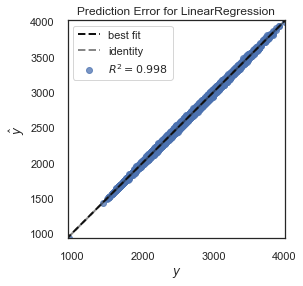

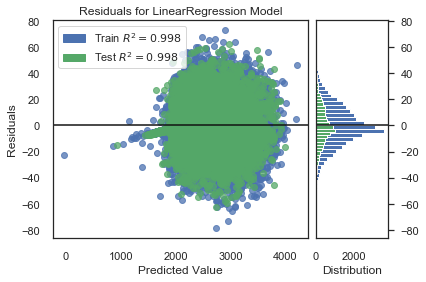

In [34]:
# solução 6: teste retirando as notas de competência 3 da redação (possível multicolinearidade)

regressao_completa_para(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 
                         'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 
                         'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 8) (33201,) (11067, 8) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.677
********************************************************************************
r2 score 0.9982560168874648
mse 274.3961929550071
mae 12.817854585039624


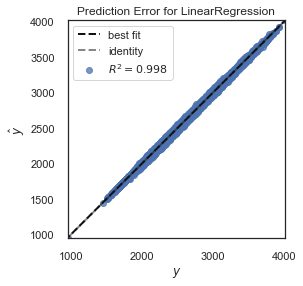

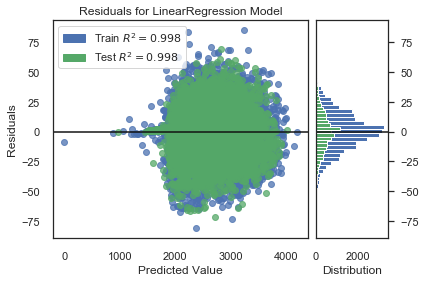

In [35]:
# solução 7: teste retirando as notas de competência 4 da redação (possível multicolinearidade)

regressao_completa_para(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 
                         'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 
                         'NU_NOTA_COMP3', 'NU_NOTA_COMP5', 'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 1) (33201,) (11067, 1) (11067,)
Usando colunas ['NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 396.677
********************************************************************************
r2 score 0.62014651010151
mse 59765.68853198293
mae 186.1770326636339


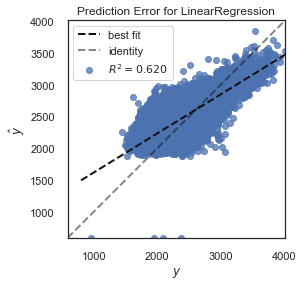

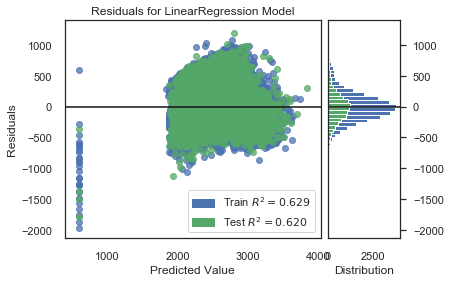

In [36]:
# solução 8: teste utilizando apenas a variável mais correlacionada (ciências humanas)

regressao_completa_para(['NU_NOTA_CH', 'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 396.677
********************************************************************************
r2 score 0.7176403748611259
mse 44426.12180440178
mae 159.3360714790735


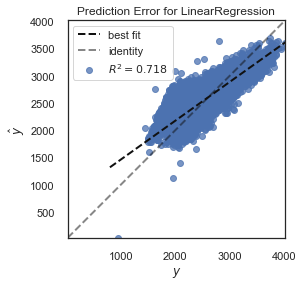

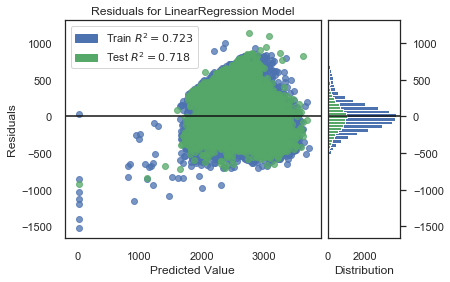

In [37]:
# solução 9: teste utilizando apenas as 2 variáveis mais correlacionadas (ciências humanas e linguagens)

regressao_completa_para(['NU_NOTA_CH', 'NU_NOTA_LC', 'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.677
********************************************************************************
r2 score 0.8917247180109096
mse 17035.901870486738
mae 103.40020028927552


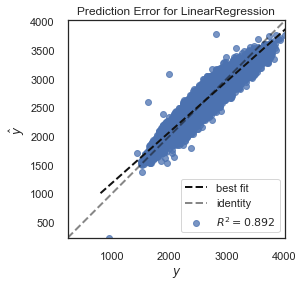

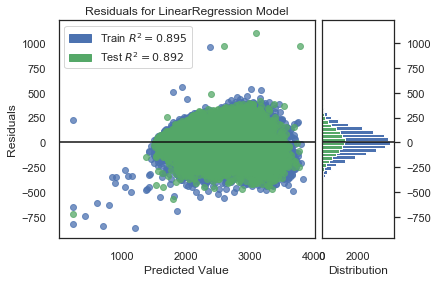

In [38]:
# solução 10: teste utilizando apenas as 3 variáveis mais correlacionadas (ciências humanas, linguagens e competência 3 da redação)

regressao_completa_para(['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_COMP3', 'nota_total'])

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 5) (33201,) (11067, 5) (11067,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'] como X
Desvio padrão do conjunto de testes 396.677
********************************************************************************
r2 score 0.968202172476979
mse 5003.031711627674
mae 56.344878470522346


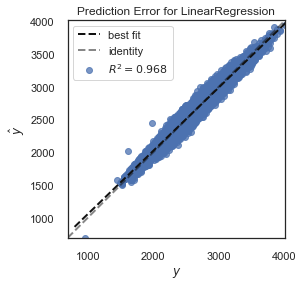

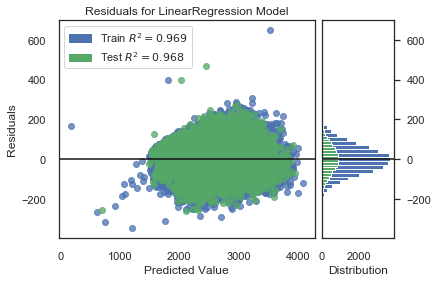

In [39]:
# solução 11: teste utilizando apenas as 5 variáveis mais correlacionadas (ciências humanas, linguagens, matemática e competências 3 e 4 da redação)

regressao_completa_para(['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'nota_total'])

## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.677
********************************************************************************
r2 score 0.9250752608326931
mse 11788.567812316252
mae 86.1874023306217


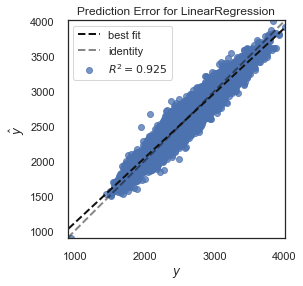

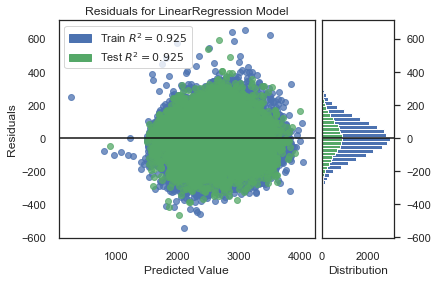

In [40]:
# solução

regressao_completa_para(['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3', 'nota_total'])

## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [41]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores():
    # gere os modelos em uma lista
    modelos = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor()]
    return modelos

In [42]:
# teste

if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [43]:
# solução

def escolhe_dados(dados, colunas):
    # extraia as colunas
    # faça o split
    # plote o histograma de train_y
    
    dados = dados[colunas]
    train_x, test_x, train_y, test_y = split(dados)
    
    plt.figure(figsize = (12,8))
    plt.title("Histograma dos valores de treino em Y", fontsize = 16)
    plt.xlabel("Nota Total", fontsize = 14)
    plt.yticks([])
    plt.hist(train_y)
    plt.show()
    
    return train_x, test_x, train_y, test_y

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [44]:
# solução:

import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine seu modelo
    modelo.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic

    # calcule a previsão para test_x
    # calcule o mse
    # calcule o mae
    pred_y = modelo.predict(test_x)
    mse = mean_squared_error(pred_y, test_y)
    mae = mean_absolute_error(pred_y, test_y)
    print("Resultado", modelo, mse, mae)

    return mse, mae, tempo_de_treino

In [45]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelo in gera_regressores():
        pipe = make_pipeline(StandardScaler(), modelo)
        # crie um pipeline chamado pipe usando StandardScaler() e o modelo
        # use o make_pipeline ou crie um Pipeline
        
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 396.677


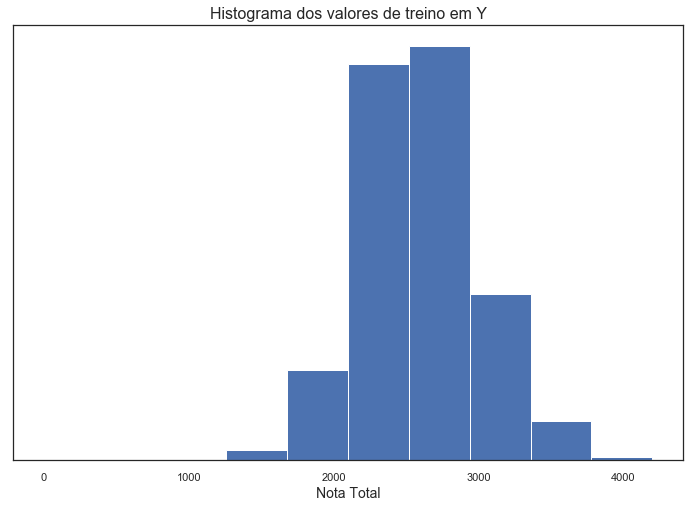

Resultado Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False) 11788.567812316254 86.18740233062171
Resultado Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False) 11786.673810163153 86.22345492148199
Resultado Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=T

,modelo,mse,mae,tempo_de_treino
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",11788.568,86.187,0.006
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",11786.674,86.223,0.011
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",11788.548,86.188,0.015
3,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",22898.231,119.276,0.117
4,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",13120.194,90.350,7.230


In [46]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

Text(0.5,0,'Valores das notas totais')

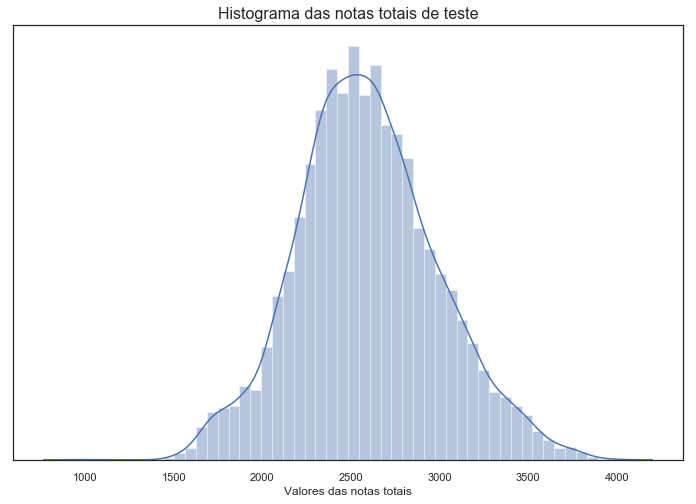

In [47]:
# solução: histograma

plt.figure(figsize = (12,8))
plt.title("Histograma das notas totais de teste", fontsize = 16)
plt.yticks([])
ax = sns.distplot(test_y)
plt.xlabel("Valores das notas totais")

## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [48]:
# solução

def top_p(serie, p = 0.75):
    # calcule o quantil p
    quant = np.quantile(serie, q = p)
    print("quantile encontrado", quant)
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    y = pd.Series([1 if numero > quant else 0 for numero in serie])
    return y

In [49]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 7.75


In [50]:
# teste do top 10%

top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 9.1


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [51]:
# código pronto

y_top25 = top_p(test_y)
y_top25.mean()

quantile encontrado 2837.8500000000004


0.2500225896810337

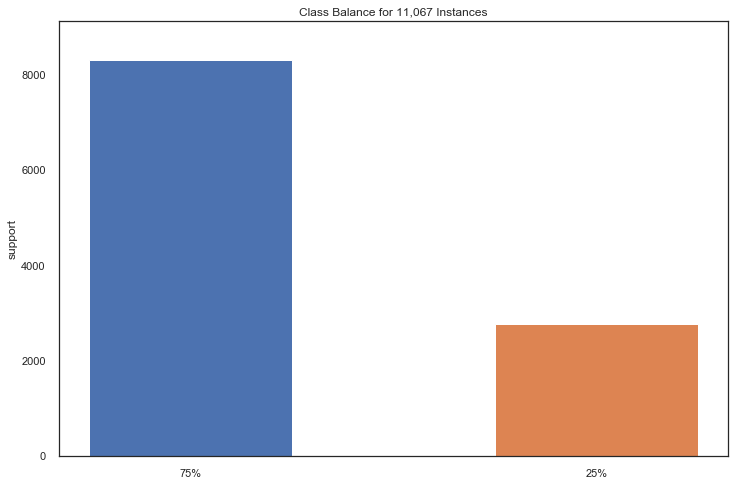

In [52]:
# código pronto

from yellowbrick.target import ClassBalance

plt.figure(figsize = (12,8))
visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

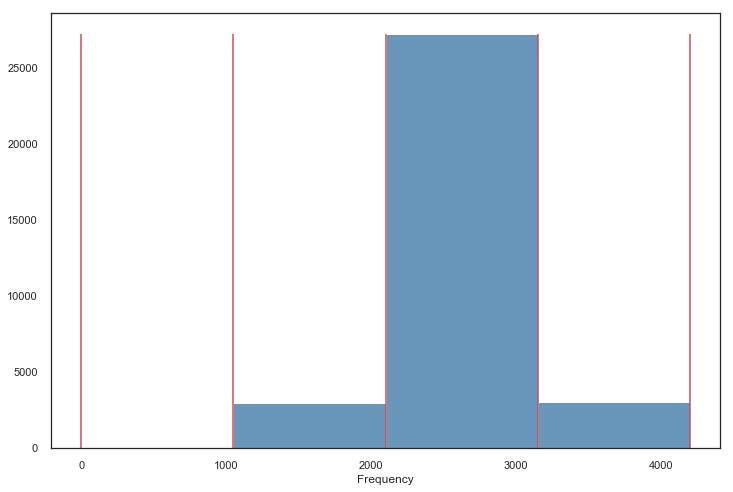

In [53]:
# código pronto

from yellowbrick.target import BalancedBinningReference

plt.figure(figsize = (12,8))
visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [54]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [55]:
# solução

def gera_classificadores():
    # defina seus modelos
    modelos = [DummyClassifier(), LogisticRegression(), RidgeClassifier(), 
               DecisionTreeClassifier(), RandomForestClassifier(), SVC()]
    return modelos

In [56]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [57]:
def split_classificacao(dados):
    # faça o seed do numpy
    # defina X como todas as colunas de `dados` exceto top_p
    # defina y como somente a coluna top_p
    # quebre em treino e teste, usando estratificação baseada em y
    
    SEED = 42367
    np.random.seed(SEED)
    X = dados.drop('top_p', axis = 1)
    y = dados['top_p']
    train_x, test_x, train_y, test_y = train_test_split(X, y, stratify = y)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [58]:
# código pronto: teste

interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse['top_p'] = top_p(interesse['nota_total'], p = 0.75).values
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


C:\Users\brunorm\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Pergunta: implemente o treino e o teste do classificador

In [59]:
# solução:

import time
from sklearn.metrics import accuracy_score
def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine o pipeline
    pipe.fit(train_x, train_y)
    pred_y = pipe.predict(test_x)
    tac = time.time()
    tempo_de_treino = tac - tic
    # calcule a accuracy_score
    acc_score = accuracy_score(pred_y, test_y)
    print("Resultado", nome, acc_score)

    return acc_score, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [60]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p = 0.75):
    interesse = dados[colunas]# selecione somente as colunas especificas de dados
    nota_total = dados['nota_total']# somente a coluna nota_total
    interesse['top_p'] = top_p(nota_total, p = p).values# defina quem está no top p

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    
    plt.figure(figsize = (12,8))
    plt.xlabel("Grupo Selecionado")
    plt.xticks([0.05, 0.95], ["Não", "Sim"])
    plt.yticks([])
    plt.title(f"Distribuição entre os {round((1-p)*100)}% melhores alunos do restante", fontsize = 16)
    train_y.hist(grid= False)
    plt.show()
    return train_x, test_x, train_y, test_y

quantile encontrado 2841.625


C:\Users\brunorm\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


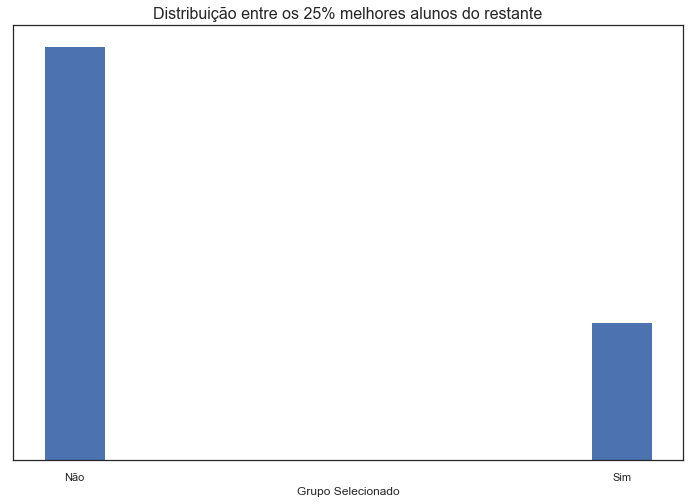

In [61]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"])#, p = 0.75

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [62]:
# código pronto

def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")

## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célula diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

C:\Users\brunorm\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


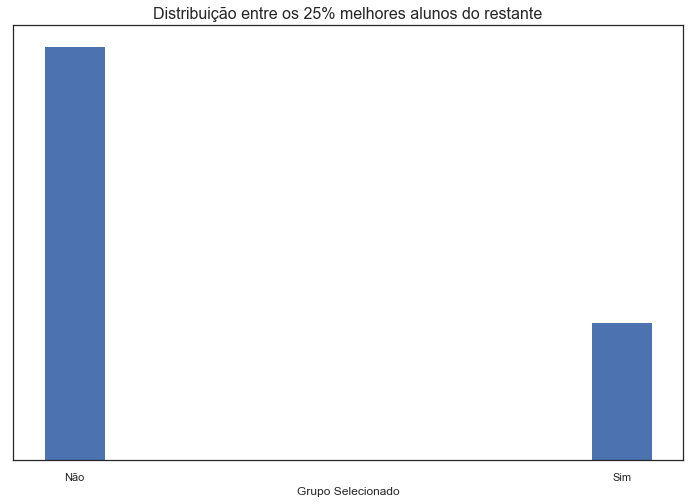

C:\Users\brunorm\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Resultado DummyClassifier 0.6217583807716635
Resultado LogisticRegression 0.9371103280021686
Resultado RidgeClassifier 0.9204843227613626
Resultado DecisionTreeClassifier 0.9072919490376796
Resultado RandomForestClassifier 0.9285262492093611
Resultado SVC 0.9374717628987078


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.622,0.013
LogisticRegression,0.937,0.038
RidgeClassifier,0.920,0.016
DecisionTreeClassifier,0.907,0.066
RandomForestClassifier,0.929,2.584
SVC,0.937,7.020


In [63]:
# solução top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.75)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2915.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.19996385651034607


C:\Users\brunorm\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


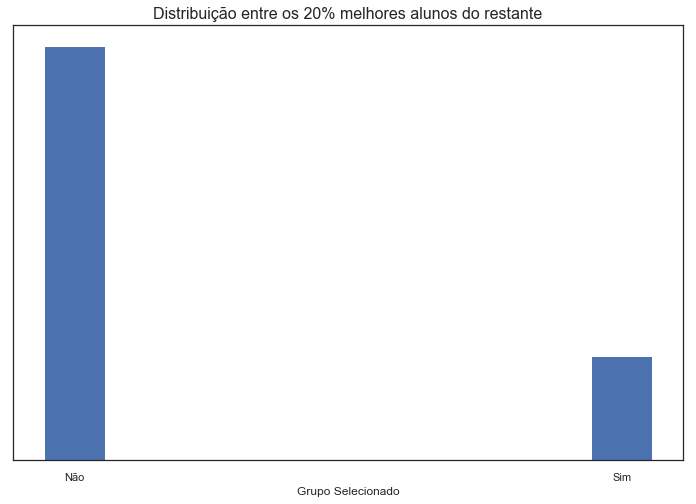

C:\Users\brunorm\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Resultado DummyClassifier 0.6801301165627541
Resultado LogisticRegression 0.9456944067949761
Resultado RidgeClassifier 0.9262672811059908
Resultado DecisionTreeClassifier 0.9219300623475196
Resultado RandomForestClassifier 0.9390078612089997
Resultado SVC 0.9461462004156501


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.680,0.008
LogisticRegression,0.946,0.037
RidgeClassifier,0.926,0.013
DecisionTreeClassifier,0.922,0.067
RandomForestClassifier,0.939,2.349
SVC,0.946,5.464


In [64]:
# solução top 20%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.80)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3119.0
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.09993674889310562


C:\Users\brunorm\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


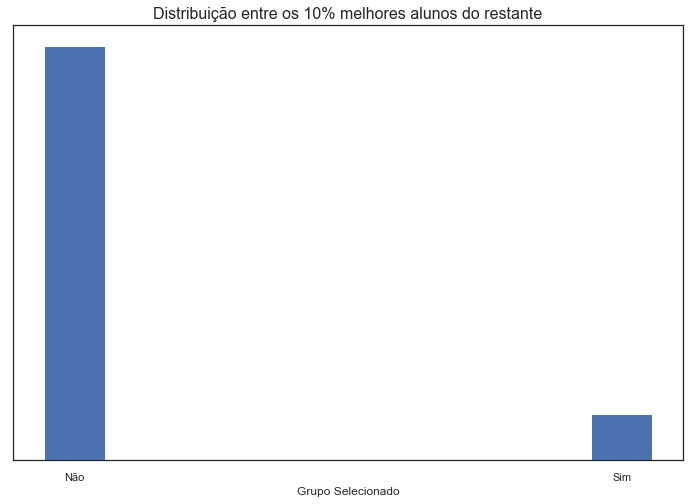

C:\Users\brunorm\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Resultado DummyClassifier 0.8220836721785488
Resultado LogisticRegression 0.9707237733803199
Resultado RidgeClassifier 0.9267190747266648
Resultado DecisionTreeClassifier 0.9568085298635584
Resultado RandomForestClassifier 0.9666576307942532
Resultado SVC 0.9700912623113762


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.822,0.007
LogisticRegression,0.971,0.043
RidgeClassifier,0.927,0.012
DecisionTreeClassifier,0.957,0.059
RandomForestClassifier,0.967,2.308
SVC,0.970,3.238


In [65]:
# solução top 10%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.90)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3290.7950000000005
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.04996837444655281


C:\Users\brunorm\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


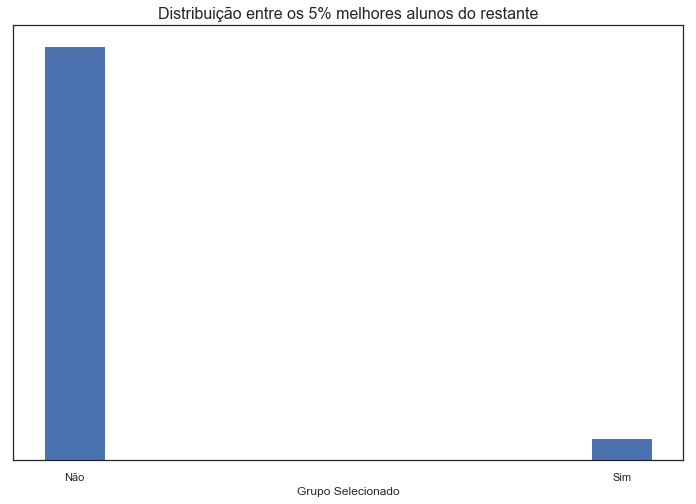

C:\Users\brunorm\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Resultado DummyClassifier 0.908105177554893
Resultado LogisticRegression 0.9793078521731273
Resultado RidgeClassifier 0.9500316255534472
Resultado DecisionTreeClassifier 0.9720791542423421
Resultado RandomForestClassifier 0.9785849823800488
Resultado SVC 0.9793982108972621


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.908,0.007
LogisticRegression,0.979,0.040
RidgeClassifier,0.950,0.013
DecisionTreeClassifier,0.972,0.056
RandomForestClassifier,0.979,1.875
SVC,0.979,1.852


In [66]:
# solução top 5%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.95)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3588.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.01002981837896449


C:\Users\brunorm\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


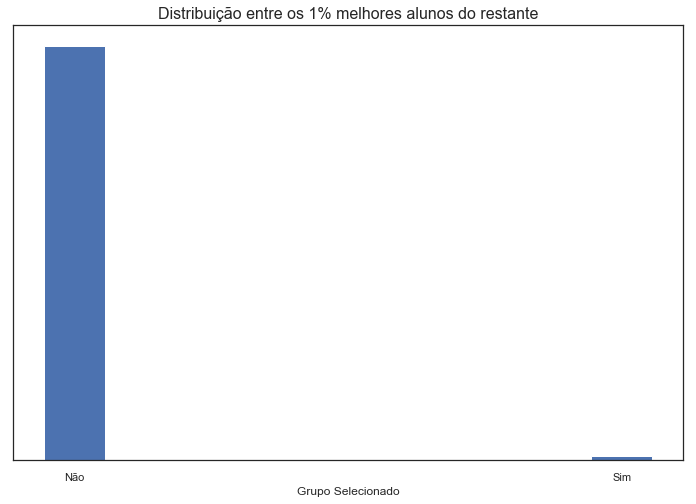

C:\Users\brunorm\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Resultado DummyClassifier 0.979940363242071
Resultado LogisticRegression 0.9946688352760459
Resultado RidgeClassifier 0.9899701816210356
Resultado DecisionTreeClassifier 0.9923195084485407
Resultado RandomForestClassifier 0.9939459654829674
Resultado SVC 0.9947591940001808


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.980,0.008
LogisticRegression,0.995,0.048
RidgeClassifier,0.990,0.012
DecisionTreeClassifier,0.992,0.051
RandomForestClassifier,0.994,1.490
SVC,0.995,0.577


In [67]:
# solução top 1%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.99)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2330.475
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.7499774103189663


C:\Users\brunorm\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


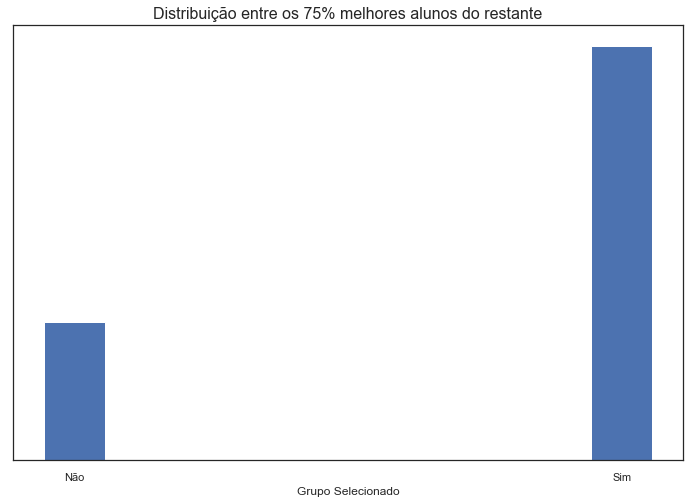

C:\Users\brunorm\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Resultado DummyClassifier 0.6264570344266739
Resultado LogisticRegression 0.9208457576579019
Resultado RidgeClassifier 0.9033161651757478
Resultado DecisionTreeClassifier 0.8882262582452336
Resultado RandomForestClassifier 0.90955091714105
Resultado SVC 0.9225625734164633


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.626,0.007
LogisticRegression,0.921,0.038
RidgeClassifier,0.903,0.014
DecisionTreeClassifier,0.888,0.072
RandomForestClassifier,0.910,2.729
SVC,0.923,8.825


In [68]:
# solução bottom 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.25)
notas[["accuracy_score", "tempo_de_treino"]]

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta para os outros p's, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


C:\Users\brunorm\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


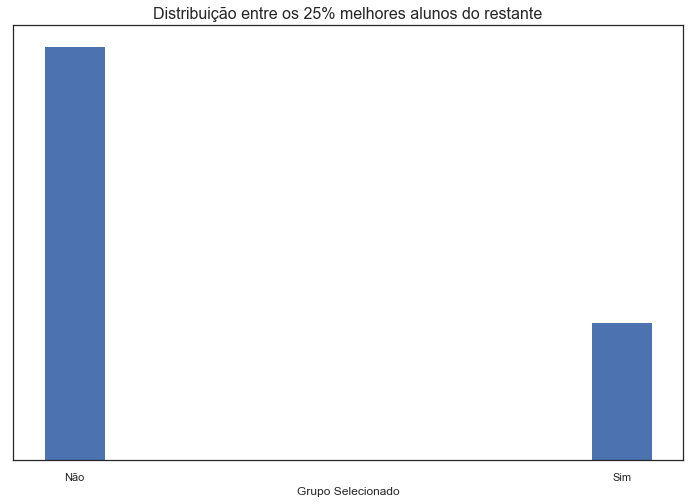

C:\Users\brunorm\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Resultado DummyClassifier 0.6217583807716635
Resultado LogisticRegression 0.9371103280021686
Resultado RidgeClassifier 0.9204843227613626
Resultado DecisionTreeClassifier 0.9072919490376796
Resultado RandomForestClassifier 0.9285262492093611
Resultado SVC 0.9374717628987078


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.622,0.007
LogisticRegression,0.937,0.038
RidgeClassifier,0.920,0.014
DecisionTreeClassifier,0.907,0.070
RandomForestClassifier,0.929,2.561
SVC,0.937,7.116


In [69]:
# código pronto: rodando para top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas de 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.75)
notas[["accuracy_score", "tempo_de_treino"]]

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [70]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis] * 100

    plt.figure(figsize = (9, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada', fontsize = 16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


Acurácia do modelo em teste 0.9371103280021686


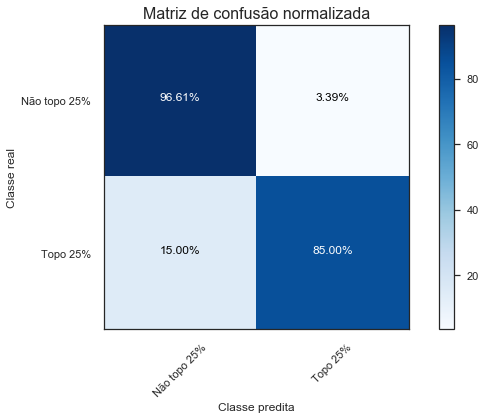

In [71]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9374717628987078


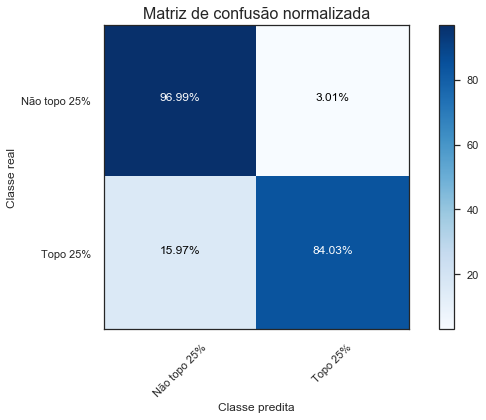

In [72]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [73]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 4382487 elementos


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [74]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]# selecione as 3 colunas
    y = top_p(dados["nota_total"],p = 0.75)# calcule o top 25% como 1 o bottom 75% como 0
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [75]:
# solução

from sklearn.model_selection import cross_val_score

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    X, y = separa_dados_de_classificacao_para_validacao(dados)
    
    scores = cross_val_score(modelo, X, y, cv  = 5)# calcule o cross_val_score
    
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

quantile encontrado 2839.5
Média da validação 0.24992658278278979
Acurácia entre [93.49,93.49]
Acurácia do modelo em teste 0.9350234239143208


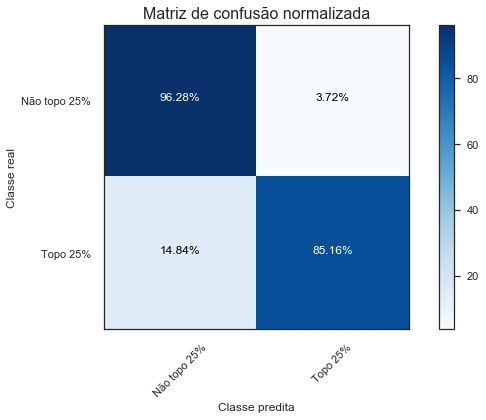

In [76]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se somente sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [77]:
# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        parcial = X.sum(axis = 1)# some **por coluna**. a função sum recebe um parâmetro para somar por coluna, não linha
        #somei por linhas porque o resultado desse algoritmo não estava fazendo sentido e o resultado final me pareceu coerente.
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self.top_25_quantile

    def predict(self, X, y = None):
        parcial = X.sum(axis = 1)
        y_pred_true_false = (parcial >= self.fit(X))# compare a soma parcial com o self.top25_quantile
        y_pred = y_pred_true_false.astype(int) # 1 se for maior ou igual, 0 caso contrário
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 2839.5
Média da validação 0.24992658278278979
top 25 quantile é 1239.80
top 25 quantile é 1277.90
top 25 quantile é 1246.50
top 25 quantile é 1253.60
top 25 quantile é 1243.80
top 25 quantile é 1264.50
top 25 quantile é 1253.00
top 25 quantile é 1226.70
top 25 quantile é 1256.20
top 25 quantile é 1214.00
Acurácia entre [90.95,90.98]
top 25 quantile é 1247.90
top 25 quantile é 1247.90
top 25 quantile é 1247.90
Acurácia do modelo em teste 0.918451555018874


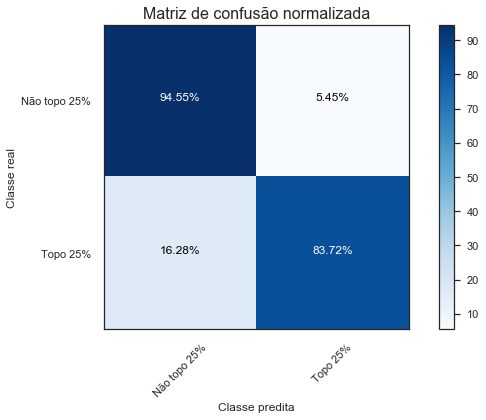

In [78]:
treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())

In [79]:
notas

,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,"DummyClassifier(constant=None, random_state=No...","(StandardScaler(copy=True, with_mean=True, wit...",0.007,0.622
LogisticRegression,"LogisticRegression(C=1.0, class_weight=None, d...","(StandardScaler(copy=True, with_mean=True, wit...",0.038,0.937
RidgeClassifier,"RidgeClassifier(alpha=1.0, class_weight=None, ...","(StandardScaler(copy=True, with_mean=True, wit...",0.014,0.920
DecisionTreeClassifier,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...","(StandardScaler(copy=True, with_mean=True, wit...",0.070,0.907
RandomForestClassifier,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...","(StandardScaler(copy=True, with_mean=True, wit...",2.561,0.929
SVC,"SVC(C=1.0, break_ties=False, cache_size=200, c...","(StandardScaler(copy=True, with_mean=True, wit...",7.116,0.937


## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

### Solução

- Acurácia Heurística: 91,85%
- Acurácia Dummy: 62,18%
- Acurácia Logistic: 93,70%

 
    
Observa-se como a regressão logística e a heurísitca final possuem uma acurácia consideravelmente superior a do DummyClassifier, estando ambas superiores a 90%. Portanto, ambas são modelos válidos para uma aplicação.
    
Agora para determinar qual seria o melhor pra aplicação, é interessante notar como a simplicidade do modelo da heurística final. Apesar da acurácia um pouco menor do que a de regressão, o processamento computacional é bem mais rápido, gerando assim uma alta relação custo benefício. Entretanto, caso o objetivo od estudo seja ter o máximo de precisão e poder computacional não é problema, a regressão logística seria o melhor modelo.

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

    Talvez seria interessante analisar os dados através das notas médias que cada aluno tirou nas provas e, então, usar as 25% médias mais altas em português, matemática e redação para prever os melhores alunos, semelhante o que foi realizado na última heurística com as notas totais. 

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

    Primeiramente, é importante ressaltar que esses tipos de erros podêm ocorrer devido a precisão/acurácia do sistema não ser de 100%. Agora você pode reduzir falsos positivos ou negativos dependendo da intenção da faculdade. Ela opta por aceitar um pouco mais do que os 25% previstos no modelo para garantir que os verdadeiros 25% ganhem a bolsa? Ou ela prefere que todos os bolsistas estejam necessariamente dentro dos 25% melhores alunos em troca de eliminar alunos que foram identificados fora deste grupo erroneamente.
    
    Com base da decisão da faculdade em manter o modelo assim, ser mais restritivo ou mais abrangente que o planejamento, algumas medidas podem ser tomadas. No caso do modelo da última heurísitica pode ser treinado com uma porcentagem maior (na situação mais generosa) ou menor (na mais rigorosa) antes de fazer as comparações e então fazer as previsões com se o modelo fosse de 25%.
    
    Já quando o modelo adotado for o de regressão logísitica, pode-se aplicar um peso maior nas notas altas (caso mais generoso) ou diminuir esse peso (caso mais rigoroso) para que a seleção seja condizente com o que se deseja.

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!